# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [7]:
import pandas as pd
df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(400))

In [8]:
df.head()

,ID,LATITUDE,LONGITUDE,ELEVATION,STATE,NAME,GSNFLAG,HCNFLAG,WMOID,x,y,x_group,y_group,xy_group,hash
0,AE000041196,25.333,55.517,34.0,NaN,SHARJAH INTER. AIRP,GSN,NaN,41196.0,5.579578e+06,2.816905e+06,5497601.479782179 to 5594934.908498545,2772265.475723952 to 2869598.904440318,"5497601.479782179 to 5594934.908498545, 277226...",1f6f0e89f4e937d934fe9acde2545e0d66bbcfe3b66320...
1,AEM00041194,25.255,55.364,10.4,NaN,DUBAI INTL,NaN,NaN,41194.0,5.567782e+06,2.808232e+06,5497601.479782179 to 5594934.908498545,2772265.475723952 to 2869598.904440318,"5497601.479782179 to 5594934.908498545, 277226...",1f6f0e89f4e937d934fe9acde2545e0d66bbcfe3b66320...
2,AEM00041217,24.433,54.651,26.8,NaN,ABU DHABI INTL,NaN,NaN,41217.0,5.532707e+06,2.716829e+06,5497601.479782179 to 5594934.908498545,2674932.047007587 to 2772265.4757239525,"5497601.479782179 to 5594934.908498545, 267493...",35c9093084d26708afc5b482ea15ba52e3f20fb7cd781f...
3,AEM00041218,24.262,55.609,264.9,NaN,AL AIN INTL,NaN,NaN,41218.0,5.637301e+06,2.697815e+06,5594934.908498544 to 5692268.33721491,2674932.047007587 to 2772265.4757239525,"5594934.908498544 to 5692268.33721491, 2674932...",2a6a7edad90579049fd1b3c3a990e8a8be90cb1975118e...
4,AFM00040990,31.500,65.850,1010.0,NaN,KANDAHAR AIRPORT,NaN,NaN,40990.0,6.243199e+06,3.502645e+06,6178935.480796736 to 6276268.909513102,3453599.476738509 to 3550932.9054548745,"6178935.480796736 to 6276268.909513102, 345359...",039e75bbef55baa3fecc0568dc3b245666a98b1bcba6b4...


In [9]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()
    
    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

Task : returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014.
<class 'str'>


<IPython.core.display.Javascript object>


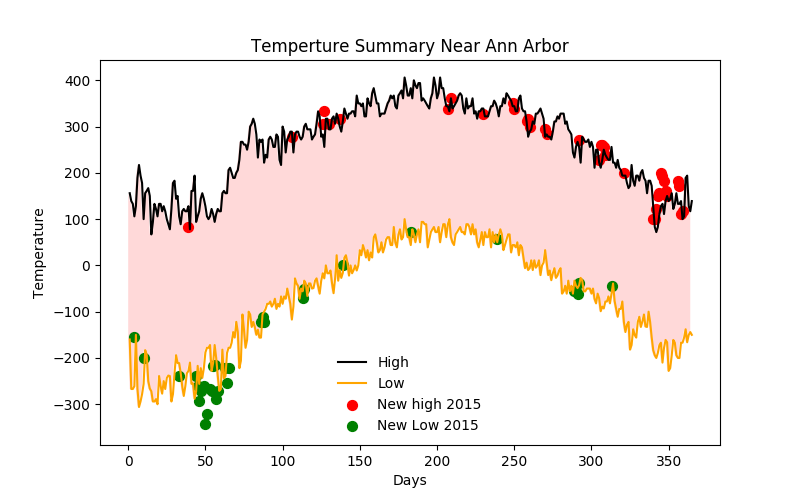

[ 39 106 126 127 130 137 207 209 230 249 250 258 259 260 270 271 292 305
 306 307 308 309 321 340 341 342 343 344 345 346 347 348 349 356 357 358
 359]


/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

print("Task : returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014.")

df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

# Drop the 29th february

NoFebCabisatIndex= df[~df["Date"].str.contains("02-29")].index
df = df.loc[NoFebCabisatIndex,:]

print(type(df["Date"].values[0])) #  Our Date <class 'str'> ,so we can do something like this 
dfno2015index = df[~df["Date"].str.contains("2015")].index # Take The index Which have not that 2015
dfno15 = df.loc[dfno2015index,:]

dfno15['Day'] = dfno15['Date'].str[-5:] # Take The last 5 in every date variable
no2015TMax = dfno15[dfno15["Element"] == "TMAX"] # Only Take TMax
no2015TMin = dfno15[dfno15["Element"] == "TMIN"] # only Take TMIN

# Each Day Temperature
no2015upper = no2015TMax.groupby("Day")["Data_Value"].max() # Grouping by Day , take The Max From 2004 - 2015 
no2015lower = no2015TMin.groupby("Day")["Data_Value"].min() # Grouping by Day , take The min From 2004 - 2015 

len(no2015upper) # 366
Days = list(range(1,366))
Days2015 = list(range(1,366))
# Plot Not included 2015
plt.figure(figsize=(8,5))
plt.plot(Days , no2015upper.values , "-" , c = "black",label = "High")
plt.plot(Days , no2015lower.values , "-" , c = "orange" , label ="Low")
plt.gca().fill_between(range(len(no2015upper)),
                      no2015upper , no2015lower,
                      facecolor = "red",
                      alpha = 0.15)
## For 15 
Only15df = df[df["Date"].str.contains("2015")] # Only take 2015
Only15df["Day"] = df.loc[:,"Date"].str[-5:] # Extract the Day

Only15TMax = Only15df[Only15df["Element"] == "TMAX"] 
Only15TMin = Only15df[Only15df["Element"] == "TMIN"]

Only15Upper = Only15TMax.groupby("Day")["Data_Value"].max()
Only15Lower = Only15TMin.groupby("Day")["Data_Value"].min()

# Is 2015 Broken The record from 2004 - 2014
MaxBroken = np.where(Only15Upper.values > no2015upper.values )[0] # Get The INdex if its broke the record
print(MaxBroken) #[ 39 106 126 127 130 137 207 209 230 ...] 
MinBroken = np.where(Only15Lower.values < no2015lower.values )[0]
# Create Scatter Plot
plt.scatter(MaxBroken, Only15Upper.iloc[MaxBroken] , c = "red" ,
            s = 50 , label = "New high 2015")
plt.scatter(MinBroken, Only15Lower.iloc[MinBroken] , c = "green" ,
            s = 50 , label = "New Low 2015")
# Make Our Plots Better , omaygat what am i doing

plt.ylabel("Temperature")
plt.title("Temperture Summary Near Ann Arbor")
plt.legend(loc = 0 ,frameon = False)
plt.xlabel("Days")

In [11]:
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106
